# Low Temperature Experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.integrate import trapezoid

In [2]:
linfit = lambda x, m, c: m*x + c

In [3]:
kB = 8.617e-5      # in eV
I = 1e-5        # constant current in A

## Cooling Data

In [4]:
df1 = pd.read_excel('Data.xlsx', sheet_name='cooling')
df2 = pd.read_excel('Data.xlsx', sheet_name='heating')
T1, V1 = df1['T'].to_numpy(), df1['V'].to_numpy()
T2, V2 = df2['T'].to_numpy(), df2['V'].to_numpy()

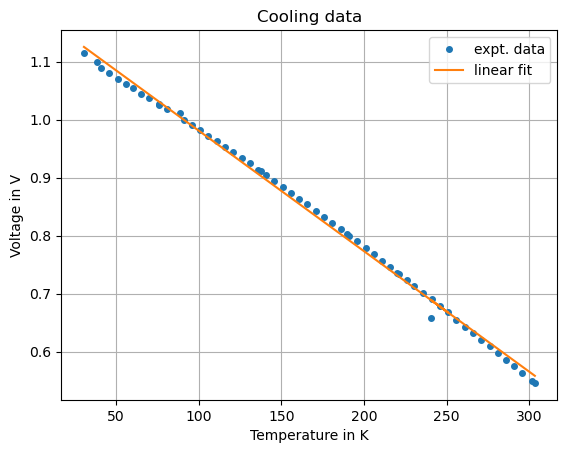

Slope = -0.0020777941357837744 V, error (std. dev.) = 1.412030927088756e-05 V/K.
Intercept = 1.1887010893905383 V, error (std. dev.) = 0.0026317048971312464 V.


In [5]:
popt, pcov = curve_fit(linfit, T1, V1)
m_cooling = popt[0]
mc_err = np.sqrt(pcov[0][0])
c_cooling = popt[1]
cc_err = np.sqrt(pcov[1][1])
V1fit = linfit(T1, *popt)
plt.plot(T1, V1, 'o', ms=4, label='expt. data')
plt.plot(T1, V1fit, label='linear fit')
plt.title('Cooling data')
plt.xlabel('Temperature in K')
plt.ylabel('Voltage in V')
plt.legend()
plt.grid()
plt.savefig('VT_cooling.png', dpi=150)
plt.show()
print(f'Slope = {m_cooling} V, error (std. dev.) = {mc_err} V/K.')
print(f'Intercept = {c_cooling} V, error (std. dev.) = {cc_err} V.')

## Heating Data

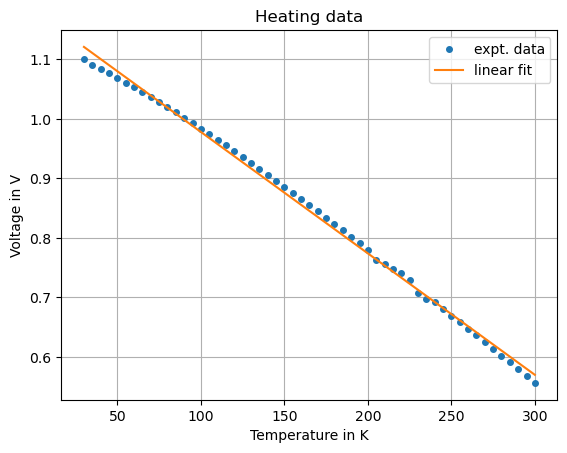

Slope = -0.0020407763344131792 V/K, error (std. dev.) = 1.4987950343181493e-05 V/K.
Intercept = 1.1821371860872656 V, error (std. dev.) = 0.00274426872881451 V.


In [6]:
popt, pcov = curve_fit(linfit, T2, V2)
m_heating = popt[0]
mh_err = np.sqrt(pcov[0][0])
c_heating = popt[1]
ch_err = np.sqrt(pcov[1][1])
V2fit = linfit(T2, *popt)
plt.plot(T2, V2, 'o', ms=4, label='expt. data')
plt.plot(T2, V2fit, label='linear fit')
plt.title('Heating data')
plt.xlabel('Temperature in K')
plt.ylabel('Voltage in V')
plt.legend()
plt.grid()
plt.savefig('VT_heating.png', dpi=150)
plt.show()
print(f'Slope = {m_heating} V/K, error (std. dev.) = {mh_err} V/K.')
print(f'Intercept = {c_heating} V, error (std. dev.) = {ch_err} V.')

## Calculation

In [7]:
m, c = (m_cooling + m_heating)/2, (c_cooling + c_heating)/2
print(f'Mean slope, m = {m} V/K. \nMean intercept, c = {c} V.')
Eg = c    # in eV
A = I*np.exp(-m/(2*kB))
print(f'Band gap, Eg = {Eg} eV. A = {A} A.')

Mean slope, m = -0.002059285235098477 V/K. 
Mean intercept, c = 1.185419137738902 V.
Band gap, Eg = 1.185419137738902 eV. A = 1.5465753844106882 A.
